# HW2 by Denis Osipychev
### Part 1: SARSA

In [1]:
# import env and modules
import gym
import numpy as np
import myenv
import matplotlib.pyplot as plt

In [2]:
# create an instance of env
env = myenv.GridWorldEnv()

In [3]:
# initialize hyperparams
n_episodes = 300
episode_lenght = 100
gamma = 0.9
alpha = 0.5
epsilon = 0.1

In [4]:
# epsilon greedy policy
def greedy_policy(Q, state):
    if np.random.uniform() < epsilon:
#         best_action = int(np.random.uniform() * 4 // 1)
        best_action = np.random.randint(4)
    else:
        best_action = np.argmax(Q[state[0]][state[1]])
    return best_action

In [5]:
#SARSA algorithm
def SARSA():
    stats = []
    Q = np.zeros((5,5,4))
    
    for i_episode in range(n_episodes):
        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
        #print('init s and a:',s,a)
        #env.render()
    
        for t in range(episode_lenght):
        
            s_prime, r, d, _ = env.step(a)
            a_prime = greedy_policy(Q, s_prime)
        
            #print('prev s,a,r,q:',s,a,"X",Q[s[0]][s[1]])
            #print('new s,a,r,q:',s_prime,a_prime,r,Q[s_prime[0]][s_prime[1]])
            #env.render()
        
            # Q Update
            q_target = r + gamma * Q[s_prime[0]][s_prime[1]][a_prime]
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            a = a_prime
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    return Q, stats

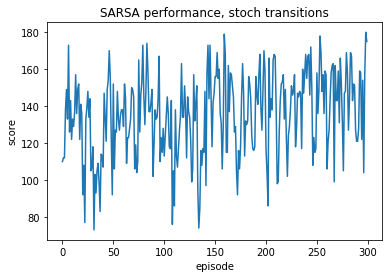

In [6]:
env.stochastic_transitions = True

Q, stats = SARSA()

plt.plot(np.asarray(stats)[:,1])
plt.title("SARSA performance, stoch transitions")
plt.ylabel("score")
plt.xlabel("episode")
plt.show()

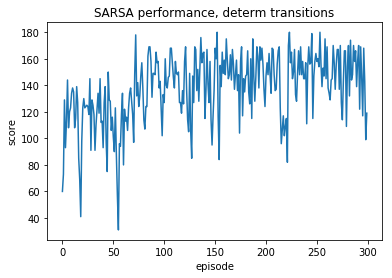

In [7]:
env.stochastic_transitions = False

Q, stats = SARSA()
        
plt.plot(np.asarray(stats)[:,1])
plt.title("SARSA performance, determ transitions")
plt.ylabel("score")
plt.xlabel("episode")
plt.show()

# HW2 by Denis Osipychev
### Part 2: Q-learning

In [8]:
# initialize q table

n_episodes = 300
episode_lenght = 100
gamma = 0.9
alpha = 0.5
epsilon = 0.05
env.stochastic_transitions = True

In [9]:
def Q_Learn():
    
    Q = np.zeros((5,5,4))
    stats = []

    for i_episode in range(n_episodes):

        r_total = 0
        s = env.reset()[:]
        a = greedy_policy(Q, s)
        #print('init s and a:',s,a)
        #env.render()
    
        for t in range(episode_lenght):
        
            a = greedy_policy(Q, s)
            s_prime, r, d, _ = env.step(a)
        
            #print('prev s,a,r,q:',s,a,"X",Q[s[0]][s[1]])
            #print('new s,a,r,q:',s_prime,a_prime,r,Q[s_prime[0]][s_prime[1]])
            #env.render()
            
            # Q Update
            q_target = r + gamma * max(Q[s_prime[0]][s_prime[1]][:])
            q_delta = q_target - Q[s[0]][s[1]][a]
            Q[s[0]][s[1]][a] = Q[s[0]][s[1]][a] + alpha * q_delta
    
            if d:
                break
                
            s = s_prime[:]
            r_total += r
        
        # Update statistics
        stats.append([i_episode,r_total])
    
    return Q, stats


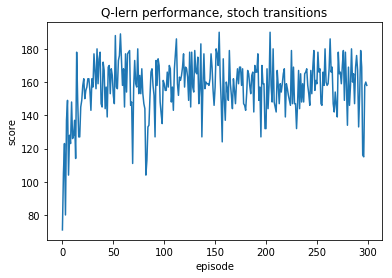

In [10]:

env.stochastic_transitions = True

Q, stats = Q_Learn()
        
plt.plot(np.asarray(stats)[:,1])
plt.title("Q-lern performance, stoch transitions")
plt.ylabel("score")
plt.xlabel("episode")
plt.show()

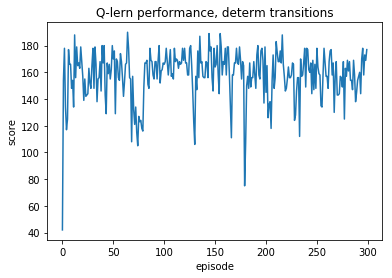

In [11]:

env.stochastic_transitions = False

Q, stats = Q_Learn()

plt.plot(np.asarray(stats)[:,1])
plt.title("Q-lern performance, determ transitions")
plt.ylabel("score")
plt.xlabel("episode")
plt.show()